In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/SophonPlus/ChineseNlpCorpus/master/datasets/ChnSentiCorp_htl_all/ChnSentiCorp_htl_all.csv')

In [ ]:
df.head()

,label,review
0,1,"距离川沙公路较近,但是公交指示不对,如果是""蔡陆线""的话,会非常麻烦.建议用别的路线.房间较..."
1,1,商务大床房，房间很大，床有2M宽，整体感觉经济实惠不错!
2,1,早餐太差，无论去多少人，那边也不加食品的。酒店应该重视一下这个问题了。房间本身很好。
3,1,宾馆在小街道上，不大好找，但还好北京热心同胞很多~宾馆设施跟介绍的差不多，房间很小，确实挺小...
4,1,"CBD中心,周围没什么店铺,说5星有点勉强.不知道为什么卫生间没有电吹风"


In [ ]:
df['review'] = df['review'].astype(str)

In [ ]:
import re

In [ ]:
pattern = re.compile('.{1}')

In [ ]:
pattern.findall(df.review[0])

['距',
 '离',
 '川',
 '沙',
 '公',
 '路',
 '较',
 '近',
 ',',
 '但',
 '是',
 '公',
 '交',
 '指',
 '示',
 '不',
 '对',
 ',',
 '如',
 '果',
 '是',
 '"',
 '蔡',
 '陆',
 '线',
 '"',
 '的',
 '话',
 ',',
 '会',
 '非',
 '常',
 '麻',
 '烦',
 '.',
 '建',
 '议',
 '用',
 '别',
 '的',
 '路',
 '线',
 '.',
 '房',
 '间',
 '较',
 '为',
 '简',
 '单',
 '.']

In [ ]:
mydata = [pattern.findall(s) for s in df.review]

In [ ]:
mydata

In [ ]:
mydata[0]

['距',
 '离',
 '川',
 '沙',
 '公',
 '路',
 '较',
 '近',
 ',',
 '但',
 '是',
 '公',
 '交',
 '指',
 '示',
 '不',
 '对',
 ',',
 '如',
 '果',
 '是',
 '"',
 '蔡',
 '陆',
 '线',
 '"',
 '的',
 '话',
 ',',
 '会',
 '非',
 '常',
 '麻',
 '烦',
 '.',
 '建',
 '议',
 '用',
 '别',
 '的',
 '路',
 '线',
 '.',
 '房',
 '间',
 '较',
 '为',
 '简',
 '单',
 '.']

In [ ]:
import tensorflow as tf

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')

In [ ]:
tokenizer.fit_on_texts(mydata)

In [ ]:
tokenizer.index_word

In [ ]:
len(tokenizer.index_word)

3635

In [ ]:
mytxtTensor = tokenizer.texts_to_sequences(mydata)

In [ ]:
mytxtTensor[0]

In [ ]:
mydata[0]

In [ ]:
mytxtTensor[0:5]

In [ ]:
mytxtTensor = tf.keras.preprocessing.sequence.pad_sequences(
    mytxtTensor,
    padding='post'#後面加0
    ,truncating='post',
    maxlen=30
)

In [ ]:
len(mytxtTensor)

7766

In [ ]:
mytxtTensor[0:5]

array([[ 516,  168, 1170,  631,  274,  193,   54,  169,    9,   55,    5,
         274,  218,  746,  552,    4,   82,    9,  108,  111,    5,  597,
        2818, 1414,  506,  597,    2,  125,    9,   69],
       [ 278,   22,   30,  116,    8,    1,    8,   13,   15,   30,    1,
         116,    7,   39,  486,  370,    1,  253,  176,   57,   65,  149,
         672,  136,  582,    4,   40,  161,    0,    0],
       [  60,   46,   78,   76,    1,  216,  577,   48,   64,  247,   24,
           1,  135,  199,   25,    4,  313,  606,  259,    2,    3,   12,
          11,  238,  187,  346,  318,   10,   51,   31],
       [ 112,  126,   21,   53,  365,  114,   26,    1,    4,   30,   18,
         302,    1,   55,   16,   18,  480,  579,  197,  154,  254, 2819,
          15,   64,  333,  112,  126,   93,  122,  441],
       [ 232,  621,  588,   97,  154,    9,  223,  447,   32,  175,   91,
          11,  979,    9,   47,  107,   88,    7,   33, 1140,  429,   17,
           4,  160,  114,   83, 

In [ ]:
X=mytxtTensor

In [ ]:
X[0:5]

array([[ 516,  168, 1170,  631,  274,  193,   54,  169,    9,   55,    5,
         274,  218,  746,  552,    4,   82,    9,  108,  111,    5,  597,
        2818, 1414,  506,  597,    2,  125,    9,   69],
       [ 278,   22,   30,  116,    8,    1,    8,   13,   15,   30,    1,
         116,    7,   39,  486,  370,    1,  253,  176,   57,   65,  149,
         672,  136,  582,    4,   40,  161,    0,    0],
       [  60,   46,   78,   76,    1,  216,  577,   48,   64,  247,   24,
           1,  135,  199,   25,    4,  313,  606,  259,    2,    3,   12,
          11,  238,  187,  346,  318,   10,   51,   31],
       [ 112,  126,   21,   53,  365,  114,   26,    1,    4,   30,   18,
         302,    1,   55,   16,   18,  480,  579,  197,  154,  254, 2819,
          15,   64,  333,  112,  126,   93,  122,  441],
       [ 232,  621,  588,   97,  154,    9,  223,  447,   32,  175,   91,
          11,  979,    9,   47,  107,   88,    7,   33, 1140,  429,   17,
           4,  160,  114,   83, 

In [ ]:
y = df.label

In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
7761    0
7762    0
7763    0
7764    0
7765    0
Name: label, Length: 7766, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=0,stratify=y)


In [ ]:
len(X_train)

4659

In [ ]:
len(X_test)

3107

In [ ]:
len(y_train)

4659

In [ ]:
len(y_test)

3107

In [ ]:
numWords = len(tokenizer.index_word)

In [ ]:
numWords

3635

In [ ]:
embedding_dim = 250   #z1,z2,.......z250
#embedding_dim = 5

In [ ]:
from tensorflow.keras import layers

In [ ]:
embedding_layer = layers.Embedding(numWords+1,embedding_dim)

In [ ]:
embedding_layer(tf.constant([13,30,1]))

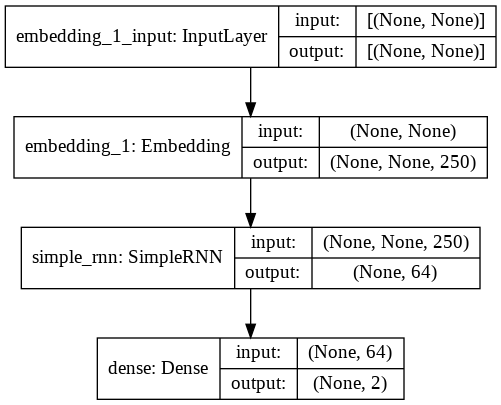

In [ ]:
RNN_C = tf.keras.Sequential(name="RNN_C")

RNN_C.add(layers.Embedding(numWords+1, embedding_dim))

RNN_C.add(layers.SimpleRNN(64))

RNN_C.add(layers.Dense(2,activation="softmax"))

tf.keras.utils.plot_model(RNN_C, show_shapes=True)

In [ ]:
RNN_C.compile(optimizer='Adam', 
              loss=tf.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
RNN_C.summary()

Model: "RNN_C"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 250)         909000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                20160     
_________________________________________________________________
dense (Dense)                (None, 2)                 130       
Total params: 929,290
Trainable params: 929,290
Non-trainable params: 0
_________________________________________________________________


In [ ]:
RNN_C.fit(X_train,y_train,epochs=20)

Epoch 1/20
146/146 [==============================] - 4s 20ms/step - loss: 0.5447 - accuracy: 0.7341
Epoch 2/20
146/146 [==============================] - 3s 20ms/step - loss: 0.3118 - accuracy: 0.8689
Epoch 3/20
146/146 [==============================] - 3s 20ms/step - loss: 0.1436 - accuracy: 0.9517
Epoch 4/20
146/146 [==============================] - 3s 20ms/step - loss: 0.0469 - accuracy: 0.9884
Epoch 5/20
146/146 [==============================] - 3s 19ms/step - loss: 0.0203 - accuracy: 0.9959
Epoch 6/20
146/146 [==============================] - 3s 20ms/step - loss: 0.0116 - accuracy: 0.9979
Epoch 7/20
146/146 [==============================] - 3s 20ms/step - loss: 0.0076 - accuracy: 0.9983
Epoch 8/20
146/146 [==============================] - 3s 19ms/step - loss: 0.0093 - accuracy: 0.9968
Epoch 9/20
146/146 [==============================] - 3s 19ms/step - loss: 0.0505 - accuracy: 0.9839
Epoch 10/20
146/146 [==============================] - 3s 20ms/step - loss: 0.0534 - accura

In [ ]:
from sklearn import metrics

#預測
y_test_predicted = RNN_C.predict_classes(X_test)

# 績效
accuracy = metrics.accuracy_score(y_test, y_test_predicted)
print(accuracy)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.7666559382040553


In [ ]:
y_test_predicted

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.64      0.59      0.61       978
           1       0.82      0.85      0.83      2129

    accuracy                           0.77      3107
   macro avg       0.73      0.72      0.72      3107
weighted avg       0.76      0.77      0.76      3107



In [ ]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test,y_test_predicted))
print("Precision:",metrics.precision_score(y_test,y_test_predicted))
print("Recall:",metrics.recall_score(y_test,y_test_predicted))

Accuracy: 0.7666559382040553
Precision: 0.8179347826086957
Recall: 0.8482855800845467


In [ ]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_test_predicted)
print(matrix)

[[ 576  402]
 [ 323 1806]]


Text(0.5, 257.44, 'Predicted label')

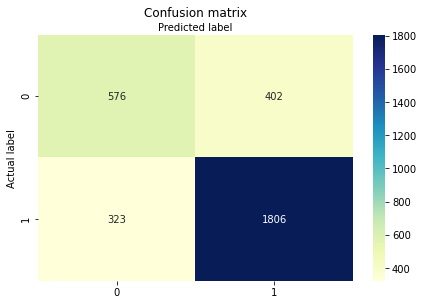

In [ ]:
#混淆矩陣視覺化(Heatmap)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')